#### <font color="blue"> 2.3.3 linear model </font>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid',  palette="pastel" )

In [5]:
#### A.Muller가 만든 패키지 
!pip install mglearn

w[0]: 0.393906  b: -0.031804


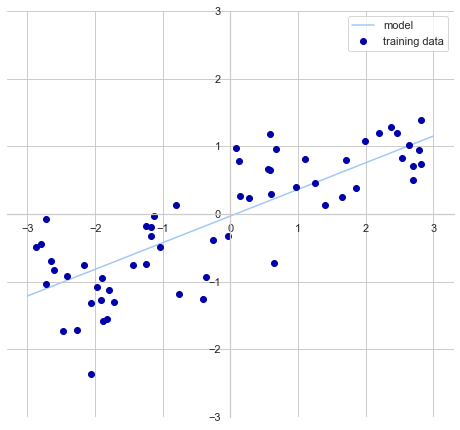

In [11]:
import mglearn
import warnings
warnings.filterwarnings("ignore")

mglearn.plots.plot_linear_regression_wave()

#### <font color="blue"> Linear model의 종류: 1) OLS (최소제곱법) </font>

In [18]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 

X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

lr = LinearRegression().fit(X_train, y_train)

In [21]:
print(lr.coef_)
print(lr.intercept_)

#### R^2 value
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

[0.39390555]
-0.031804343026759746
0.6700890315075756
0.65933685968637


In [22]:
#### Boston House price에 대한 linear regression modeling 

In [25]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)

print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.9520519609032729
0.6074721959665934


##### * <font color="blue"> training model score = 0.95, test model score = 0.61 ---> 이는 모델이 overfitting 되었다는 것을 의미함 </font>

#### <font color="blue"> Linear model의 종류: 2) Ridge Regression </font>

In [28]:
from sklearn.linear_model import Ridge

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

ridge = Ridge().fit(X_train, y_train)

print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.8857966585170941
0.7527683481744754


In [29]:
#### ==> Ridge 모형이 선형회귀 모형 대비 overfitting 정도가 완화되었다. 

In [34]:
#### parameter alpha가 높아질수록 모형이 보다 일반화 된다. 
ridge02 = Ridge(alpha = 0.2).fit(X_train, y_train)

print(ridge02.score(X_train, y_train))
print(ridge02.score(X_test, y_test))

0.9199279491313923
0.7749447069768518


In [35]:
ridge05 = Ridge(alpha = 0.5).fit(X_train, y_train)

print(ridge05.score(X_train, y_train))
print(ridge05.score(X_test, y_test))

0.9037403798627097
0.767563830258782


#### <font color="blue"> Linear model의 종류: 3) Lasso Regression </font>

In [37]:
from sklearn.linear_model import Lasso

X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lasso = Lasso().fit(X_train, y_train)

print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.29323768991114607
0.20937503255272294


In [38]:
#### 모형 예측력이 낮으므로, alpha값을 조정한다. alpha값이 낮을 수록 일반화 된다. 

lasso001 = Lasso(alpha = 0.01).fit(X_train, y_train)
print(lasso001.score(X_train, y_train))
print(lasso001.score(X_test, y_test))

0.8961122320864716
0.7677995670886713


##### <font color="blue">- Summary : Linear Regression 보다 좀더 일반화된 모형을 얻고자 할때, 계수에 어느정도 제한을 주는 Ridge Regression을 사용한다. </font> 
##### <font color="blue">- Lasso Regression은 Ridge 보다 더욱 강력한 제한을 가한다. (특정 계수들을 0으로 만들어 버린다.) </font>
##### <font color="blue">- 통상 Ridge가 많이 쓰이나, 불필요한 특성이 너무 많은 경우 일부 특성을 제외해 버리는 Lasso가 유용한 경우도 있다. </font>

#### <font color="blue"> Linear model의 종류: 4) Logistic Regression </font>

In [40]:
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

logit = LogisticRegression().fit(X_train, y_train)

print( logit.score(X_train, y_train) )
print( logit.score(X_test, y_test) )

0.9530516431924883
0.958041958041958


In [44]:
#### train, test score가 비슷하여 underfitting이 의심된다. C값을 조정하여 모형의 제약을 좀더 풀어주자 
#### C의 기본값은 1이며, 높아질 수록 모형이 제약을 풀어주어 보다 일반화, 즉 test 데이터에 적합하게 된다. 

In [43]:
logit100 = LogisticRegression(C=100).fit(X_train, y_train)

print( logit100.score(X_train, y_train) )
print( logit100.score(X_test, y_test) )

0.971830985915493
0.965034965034965


#### <font color="blue"> Linear model의 종류: 5) Linear SVC(Support Vector Classifier) </font>

In [45]:
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

X, y = make_blobs(random_state = 42)
linear_svm = LinearSVC().fit(X, y)

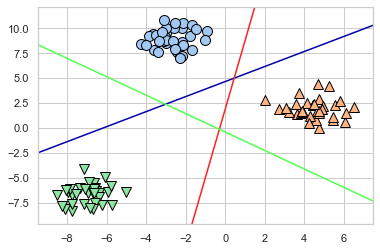

In [47]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip( linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors ): 
    plt.plot(line, -(line*coef[0] + intercept) / coef[1], c = color )

- linear model에서 중요한 parameter 
  - 1) linear regression : alpha 
  - 2) Logistic regression, LinearSVC : C 
  
  
- alpha값이 클수록, C값이 작을수록 모델이 단순해진다. 
- 최적의 alpha, c값을 찾을때 보통 로그스케일, 즉 0.01 > 0.1 > 10 과 같이 자릿수가 바뀌도록 10배씩 변경하면서 최적치를 정한다. 